# How Quantum Power Helps to Win a Coin Game

A quantum coin game to illustrate the power of quantum superposition and interference - implemented by [Jan-R. Lahmann](https://twitter.com/JanLahmann) using [Qiskit](http://qiskit.org), [binder](https://mybinder.org) and [RISE](https://rise.readthedocs.io/).

Inspired by the TED talk of Shohini Ghose  
["Quantum computing explained in 10 minutes"](https://www.ted.com/talks/shohini_ghose_quantum_computing_explained_in_10_minutes)  

(hit space or right arrow to move to next slide)

https://www.ted.com/talks/shohini_ghose_quantum_computing_explained_in_10_minutes

## Usage instructions for the user interface

1. "Ctrl -" and "Ctrl +" (or "command -", "command +") adjust the zoom level to fit the text to the browser window
* Use "space" and "shift  space" to navigate through the slides 
* "Shift Enter" executes the interactive cells (might need to click the cell, first)
* Execute the interactive cells on each slide ("In [1]:", etc)
* In case a cell is not formatted correctly, try to double-click and then "Shift Enter" to re-execute
* Interactive cells can be modified, if needed
* "X" at the top left exits the slideshow and enters the jupyter notebook interface

## The Coin Game

Two players, A(lice) and B(ob), play a coin game.  

1. The game starts with the coin showing Heads.
* Player A starts and may either turn the coin or leave it as is. 
* The moves are hidden, i.e. not revealed to the other player.
* B may now also turn the coin or leave it as is.
* A then has the third and final move.
* Now the coin gets revealed. 
* If it shows Heads, A wins; if it shows Tails, B wins.

This notebook implements the coin game using Qiskit, an SDK by IBM to program quantum computers.  

On three separate slides, the players can make their choice to either turn the coin (apply an "X-Gate") or leave it as is (apply an "id-Gate" / identity-Gate).  
Heads is encoded by "0", Tails encoded by "1".  
At the end, the quantum program evaluates the moves and declares the winner.  

In a second phase, one player will be allowed to use an additional gate ("coin move"), which is only available in the Quantum world: the "Hadamard Gate".  
Will this change the game?

The game can also be played using the IBM "Quantum Composer" graphical UI https://quantumexperience.ng.bluemix.net/qx/editor

In [1]:
# hit "shift + Enter" to execute this cell
# loading some basic functions needed for the game
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute, BasicAer
from qiskit.tools.visualization import plot_histogram, circuit_drawer
from ipywidgets import interact

/Users/majl/anaconda3/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


In [3]:
# hit "shift + Enter" to execute this cell
# auxillary functions for the coin moves

def MoveA1(move_A1): global moveA1; moveA1=move_A1;
def MoveB1(move_B1): global moveB1; moveB1=move_B1;
def MoveA2(move_A2): global moveA2; moveA2=move_A2;

In [4]:
# hit "shift + Enter" to execute this cell
# auxillary function to identify the winner

def who_wins(counts):
    if len(counts)==1 :
        print('The winner is', 'A' if ("0" in counts) else 'B')
    else:
        count0=counts["0"]
        count1=counts["1"]
        print('The coin is in superposition of |0⟩ and |1⟩')
        print('A wins with probability',  "%.1f%%" % (100.*count0/(count0+count1)))
        print('B wins with probability',  "%.1f%%" % (100.*count1/(count0+count1)))
    return()

## Ready to play?

## Player A makes the first move and applies an X-Gate (turn the coin) or id-Gate (leave it is)

In [5]:
# hit "shift + Enter" to execute this cell
# then make your choice using the drop-down widget
interact(MoveA1, move_A1={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_A1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

## Player B makes the his move and applies an X-Gate (turn the coin) or id-Gate (leave it is)

In [6]:
# hit "shift + Enter" to execute this cell 
# you might need to click the cell, first, to activate it
# then make your choice using the drop-down widget
interact(MoveB1, move_B1={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_B1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

## Player A makes his second move and applies an X-Gate (turn the coin) or id-Gate (leave it is)

In [7]:
# hit "shift + Enter" to execute this cell
# you might need to click the cell, first, to activate it
# then make your choice using the drop-down widget
interact(MoveA2, move_A2={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_A2', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

In [9]:
# optional: print the three moves. 
# 0: id Gate (leave the coin unchanged), 1: X Gate (turn the coin)
print(moveA1, moveB1, moveA2)

1 1 0


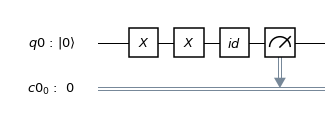

In [10]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend

# 1. move of A
qc.iden(q[0]) if (moveA1 == 0) else qc.x(q[0]) 
    
# 1. move of B 
qc.iden(q[0]) if (moveB1 == 0) else qc.x(q[0])      

# 2. move of A
qc.iden(q[0]) if (moveA2 == 0) else qc.x(q[0]) 
    
qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit

In [11]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner

{'0': 200}
The winner is A


/Users/majl/anaconda3/envs/Qiskitenv/lib/python3.7/site-packages/marshmallow/schema.py:364: ChangedInMarshmallow3Warning: strict=False is not recommended. In marshmallow 3.0, schemas will always be strict. See https://marshmallow.readthedocs.io/en/latest/upgrading.html#schemas-are-always-strict
  ChangedInMarshmallow3Warning


## Is there a safe strategy for A to always win the game? (or for B)


It is easy to see that A and B will win with the same probability.  
There is no strategy for A (or B) to increase this probability - and certainly no strategy to always win.

Does this change if A has "Quantum Power" and may use "H-Gates" in addition to id and X?
(B may still only use id- and X-Gates)

Is there a safe strategy for A (or B) to always win using the new power?  
How do you interpret this? Is it a "sleight of hand" or is there more behind it?

## Ready to play with Quantum Power?
A may now use id-, X- and H-gates.  
B may use only id- and X-gates.

## Player A makes the first move and applies an id-, X- or H-Gate

In [12]:
interact(MoveA1, move_A1={'id Gate':0,'X Gate':1, 'H Gate':2});

interactive(children=(Dropdown(description='move_A1', options={'id Gate': 0, 'X Gate': 1, 'H Gate': 2}, value=…

## Player B makes his first move and applies an id- or X-Gate

In [13]:
interact(MoveB1, move_B1={'id Gate':0,'X Gate':1});

interactive(children=(Dropdown(description='move_B1', options={'id Gate': 0, 'X Gate': 1}, value=0), Output())…

## Player A makes her second move and applies an id-, X- or H-Gate

In [14]:
interact(MoveA2, move_A2={'id Gate':0,'X Gate':1, 'H Gate':2});

interactive(children=(Dropdown(description='move_A2', options={'id Gate': 0, 'X Gate': 1, 'H Gate': 2}, value=…

In [15]:
# optional: print the three moves. 
# 0: id Gate (leave the coin unchanged), 1: X Gate (turn the coin), 2: H Gate
print(moveA1, moveB1, moveA2)

2 1 0


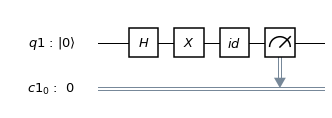

In [16]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend

# 1. move of A
if   moveA1 == 0 : qc.iden(q[0])
elif moveA1 == 1 : qc.x(q[0]) 
elif moveA1 == 2 : qc.h(q[0]) 
    
# 1. move of B 
if   moveB1 == 0 : qc.iden(q[0])
elif moveB1 == 1 : qc.x(q[0])     

# 2. move of A
if   moveA2 == 0 : qc.iden(q[0])
elif moveA2 == 1 : qc.x(q[0]) 
elif moveA2 == 2 : qc.h(q[0]) 

qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit

{'1': 93, '0': 107}
The coin is in superposition of |0⟩ and |1⟩
A wins with probability 53.5%
B wins with probability 46.5%


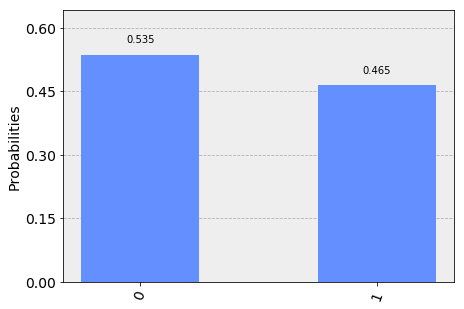

In [17]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs
who_wins(counts); # celebrate the winner

plot_histogram(counts) # Visualise the results

## Want to make some own experiments to understand the state of the qubit ("quantum coin")?

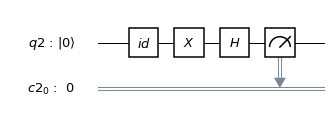

In [18]:
# create the quantum circuit with the chosen coin moves
q = QuantumRegister(1) # create a quantum register with one qubit
# create a classical register that will hold the results of the measurement
c = ClassicalRegister(1) 
qc = QuantumCircuit(q, c) # creates the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # define the backend


# define the quantum gates (=coin moves) as you like
# you could also try change the number of moves to just 1 or 2
#qc.iden(q[0])
#qc.x(q[0]) 
#qc.h(q[0]) 

qc.iden(q[0])
qc.x(q[0]) 
qc.h(q[0])

qc.measure(q, c) # Measure the qubits
qc.draw(output='mpl') # plot the circuit

{'1': 105, '0': 95}


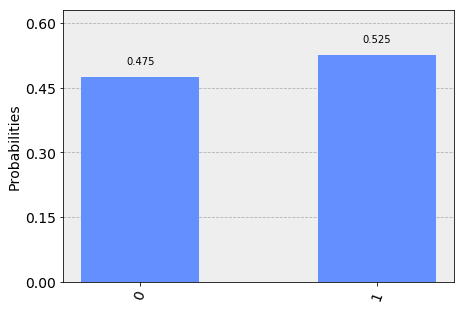

In [19]:
# execute the quantum circiut (coin moves) and identify the winner

job = execute(qc, backend, shots=200) # run the job simulation

result = job.result() # grab the result

counts = result.get_counts(qc) # results for the number of runs

print(counts); # print the results of the runs

plot_histogram(counts) # Visualise the results


## Some Quantum Theory related to this Coin Game

(hint: In case a cell is not formatted correctly, try to double-click and then "Shift Enter" to re-execute)  
A (general) quantum state can be written as $\;\; \alpha |0\rangle + \beta |1\rangle $.  
It is called a superposition of $\;|0\rangle\;$  and $\;|1\rangle\;$.  
$ \alpha , \beta $ are generalized probabilities (for measuring 0 or 1) with $\; \alpha , \beta \in \mathbb{C},\; |\alpha|^2 + |\beta|^2 = 1$.

A quantum gate acting on a single qubit can be defined by its action on the basis vectors $|0\rangle$  and $|1\rangle$.

X-Gate maps $\;|0\rangle$  to $|1\rangle\;$  and $\;|1\rangle$  to $|0\rangle$. 

Hadamard-Gate maps $\;|0\rangle\;$ to $\;\frac{|0\rangle + |1\rangle}{\sqrt{2}}\;\;$  and   $\;\;|1\rangle\;$ to $\;\frac{|0\rangle - |1\rangle}{\sqrt{2}}$.

If we can show that 
$$ H(\; id( H(|0\rangle) ) \;) = |0\rangle\, $$
and 
$$ H(\;\, X( H(|0\rangle) ) \;)  = |0\rangle, $$  
it becomes clear that if A applies an H-Gate in both of her moves, she wins the game - independent of the move of B (X or id).

Remember: Heads is encoded by $|0\rangle$, Tails encoded by $|1\rangle$. 

The first equation holds because:  

\begin{align*} 
H(\; id(\; H(|0\rangle) \;)\; ) 
      = &\;\; H(\; H(|0\rangle)\; )  \\
      = &\;\; H(\; \frac{|0\rangle + |1\rangle}{\sqrt{2}}\;) \\
      = &\;\; \frac{1}{\sqrt{2}}\;(\; H(|0\rangle) + H(|1\rangle) \;) \\
      = &\;\; \frac{1}{\sqrt{2}}\;(\;\frac{|0\rangle + |1\rangle}{\sqrt{2}} + \frac{|0\rangle - |1\rangle}{\sqrt{2}}\;) \\
      = &\;\; \frac{1}{{2}}\; (\;|0\rangle + |1\rangle + |0\rangle - |1\rangle\; )\\
      = &\;\; |0\rangle
\end{align*}

This fundamentaly uses superposition (created by the H-Gate) and in the last equality (destructive) interference of the amplitudes (generalized probabilities) of $|1\rangle$.

In case B choses to use an X-Gate instead of id, the following identity

$$ X(\; H(|0\rangle) \;) = X\; (\;\frac{|0\rangle + |1\rangle}{\sqrt{2}}\; ) = \frac{|1\rangle + |0\rangle}{\sqrt{2}} = H(|0\rangle) $$

can be used to show that the final state is $ |0\rangle$:

$$ H(\; X( H(|0\rangle) ) \;) = H(\; H(|0\rangle)\; ) = |0\rangle $$

[These charts](https://github.com/JanLahmann/Fun-with-Quantum/raw/master/QuantumTheory-for-QuantumCoinGame.pdf) explain a bit more of the quantum theory and formlism required to prove the above identities, in case you are interested.

We now have shown that the final state is always $ |0\rangle$, independent of the move of B.  

Thus, A wins the game with certainty, if she applies an H-Gate in both of her moves.

How do you interpret this?  
Is it a "sleight of hand" or is there more to it?  

Hint:  
What if an "algorithm" could use the "extra moves" to calculate answers that cannot be calculated (or take much longer to be calculated) with "classical moves"?